In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from config import ROOT_DIR

In [3]:
df = pd.read_csv(ROOT_DIR + "/data/processed/lichess_db_standard_rated_2017-03.csv")

In [12]:
df[(df["Draw"] == 1) & (df["GameDuration"] < 60)]

,Event,WhiteElo,BlackElo,TimeControl,Result,MeanElo,EloDiff,BaseTime,IncrementTime,ZeroIncrementTime,ResultEncoded,WhiteWin,BlackWin,Draw,times_in_second,GameDuration,DrawEventProb,WhiteWinEventProb,BlackWinEventProb
1567,Rated Bullet game,1824,1865,60+0,1/2-1/2,1844.5,-41,60,0,1,2,0,0,1,"[60, 60, 58, 60, 58, 60, 57, 59, 56, 58, 56, 5...",56,0.010724,0.495897,0.493379
2907,Rated Bullet tournament,2323,2327,60+0,1/2-1/2,2325.0,-4,60,0,1,2,0,0,1,"[60, 60, 60, 60, 59, 58, 58, 58, 58, 57, 58, 5...",39,0.008426,0.502528,0.489046
6821,Rated Bullet game,1922,1702,30+0,1/2-1/2,1812.0,220,30,0,1,2,0,0,1,"[30, 30, 30, 30, 30, 29, 30, 29, 30, 28, 30, 2...",42,0.010724,0.495897,0.493379
7448,Rated Bullet game,2080,2177,60+0,1/2-1/2,2128.5,-97,60,0,1,2,0,0,1,"[60, 60, 59, 60, 59, 59, 59, 59, 59, 58, 59, 5...",57,0.010724,0.495897,0.493379
21043,Rated Bullet tournament,2128,1960,30+0,1/2-1/2,2044.0,168,30,0,1,2,0,0,1,"[30, 30, 29, 29, 29, 28, 29, 28, 27, 27, 27, 2...",57,0.008426,0.502528,0.489046
23543,Rated Bullet tournament,2146,1954,30+0,1/2-1/2,2050.0,192,30,0,1,2,0,0,1,"[30, 30, 30, 30, 29, 30, 29, 30, 29, 29, 29, 2...",59,0.008426,0.502528,0.489046
26004,Rated Bullet game,2650,2614,30+0,1/2-1/2,2632.0,36,30,0,1,2,0,0,1,"[30, 30, 30, 30, 30, 29, 30, 29, 30, 28, 29, 2...",48,0.010724,0.495897,0.493379
26601,Rated Bullet game,2625,2635,30+0,1/2-1/2,2630.0,-10,30,0,1,2,0,0,1,"[30, 30, 30, 30, 28, 29, 28, 29, 27, 29, 27, 2...",37,0.010724,0.495897,0.493379
27701,Rated Bullet tournament,1457,1529,30+0,1/2-1/2,1493.0,-72,30,0,1,2,0,0,1,"[30, 30, 29, 29, 29, 29, 27, 27, 25, 26, 23, 2...",58,0.008426,0.502528,0.489046
31616,Rated Bullet game,2026,2171,30+0,1/2-1/2,2098.5,-145,30,0,1,2,0,0,1,"[30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 3...",52,0.010724,0.495897,0.493379


In [5]:
data = df[(df["GameDuration"] > 0) & (df["GameDuration"] < 4000)].copy()

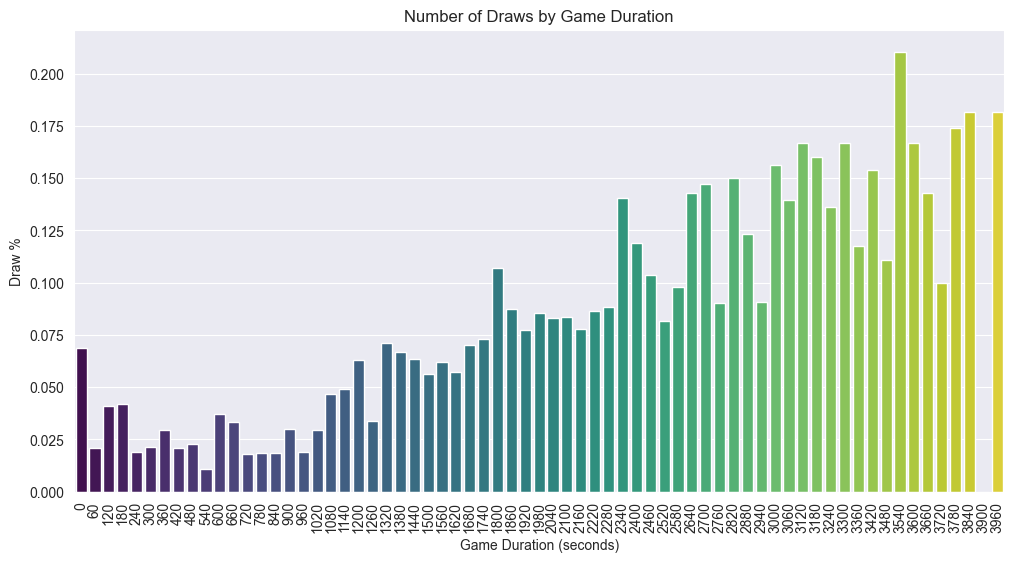

In [6]:
bin_size = 60

bins = np.arange(0, data["GameDuration"].max() + bin_size, bin_size)
data["duration_bin"] = pd.cut(data["GameDuration"], bins, labels=bins[:-1])

total_games = data["duration_bin"].value_counts().reset_index()
draw_counts = data[data["Draw"] == 1]["duration_bin"].value_counts().reset_index()
draw_counts["count"] /= total_games["count"]


plt.figure(figsize=(12, 6))
sns.barplot(x="duration_bin", y="count", hue="duration_bin", data=draw_counts, dodge=False, palette="viridis", legend=False)
plt.xlabel("Game Duration (seconds)")
plt.ylabel("Draw %")
plt.title("Number of Draws by Game Duration")
plt.xticks(rotation=90)
plt.show()

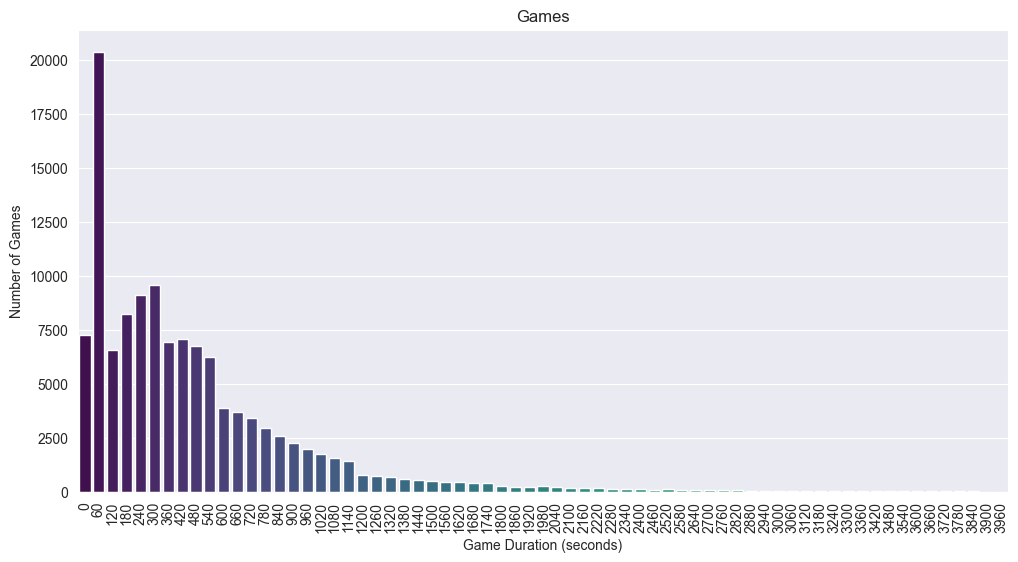

In [7]:
total_games = data["duration_bin"].value_counts().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x="duration_bin", y="count", hue="duration_bin", data=total_games, dodge=False, palette="viridis", legend=False)
plt.xlabel("Game Duration (seconds)")
plt.ylabel("Number of Games")
plt.title("Games")
plt.xticks(rotation=90)
plt.show()

In [8]:
total_games

,duration_bin,count
0,60,20374
1,300,9566
2,240,9126
3,180,8239
4,0,7239
...,...,...
62,3720,12
63,3780,11
64,3840,11
65,3960,10
